In [1]:
import numpy as np
from sympy import *
import sympy as sy

temp = np.array( [ 2.5, 5, 7.5, 10 ])
ice = np.array( [8.5, 10.5, 13.5, 27.5] )

a = symbols('b1')
b = symbols('b0')

fx = sum(  ( ice - ( a*temp + b))**2 )

pprint( sy.simplify(fx) )

derivative1 = Derivative( fx, a).doit()
derivative2 = Derivative( fx, b).doit()

pprint( derivative1 )
pprint( derivative2 )

result = solve( (derivative1, derivative2), dict=True )
print( result )



      2                                   2                    
4.0⋅b₀  + 50.0⋅b₀⋅b₁ - 120.0⋅b₀ + 187.5⋅b₁  - 900.0⋅b₁ + 1121.0
50.0⋅b₀ + 375.0⋅b₁ - 900.0
8.0⋅b₀ + 50.0⋅b₁ - 120.0
[{b0: 0.0, b1: 2.40000000000000}]


In [2]:
import numpy as np
from sympy import *
import sympy as sy

temp = np.array( [ 2.5, 5, 7.5, 10 ])
ice = np.array( [8.5, 10.5, 13.5, 27.5] )

x = symbols('x')

fx = 2*x + 2.5
fx2 = 2.4*x

fx_y = []
fx2_y = []

for i in range( len(temp ) ) :
  fx_y.append(  fx.subs( x, temp[i] ) )
  fx2_y.append(  fx2.subs( x, temp[i] ) )

print( fx_y )
print( fx2_y )

r1 = (1/4)*np.sum( ( ice - np.array(fx_y) )**2 )
r2 = (1/4)*np.sum( ( ice - np.array(fx2_y) )**2 )

print( 'fx : %.2f, fx2 : %.2f'%(r1, r2 ) )



[7.50000000000000, 12.5000000000000, 17.5000000000000, 22.5000000000000]
[6.00000000000000, 12.0000000000000, 18.0000000000000, 24.0000000000000]
fx : 11.50, fx2 : 10.25


   temperature  harvest
0            5       16
1           10       23
2           15       31
3           20       50
기울기: [2.2]
절편: 2.5000000000000036


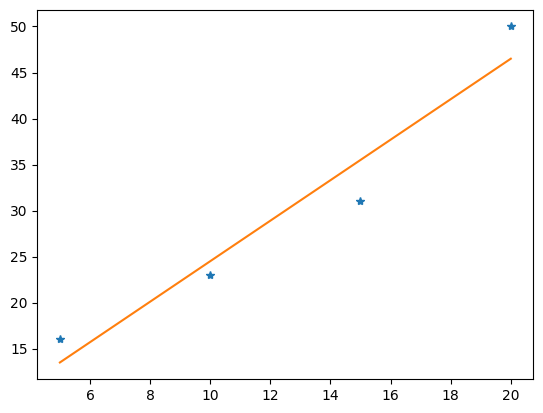

In [3]:
# 다음 표는 기온과 수확량을 나타낸 것이다. 최소의 평균제곱근오차를 찾아 음료수 판매량에 대한 선형회귀 모델 f를 구하시오.

from sklearn.linear_model import LinearRegression
import pandas as df
import matplotlib.pyplot as plt
data = df.DataFrame( { "temperature":[5,10,15,20], "harvest":[16,23,31,50] } )
print(data)

X = data['temperature']
Y = data['harvest']
lineFit = LinearRegression()
lineFit.fit(X.values.reshape(-1,1), Y)
print('기울기:', lineFit.coef_)
print('절편:', lineFit.intercept_)

plt.plot(X, Y, '*')
plt.plot(X,lineFit.predict(X.values.reshape(-1,1)))
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


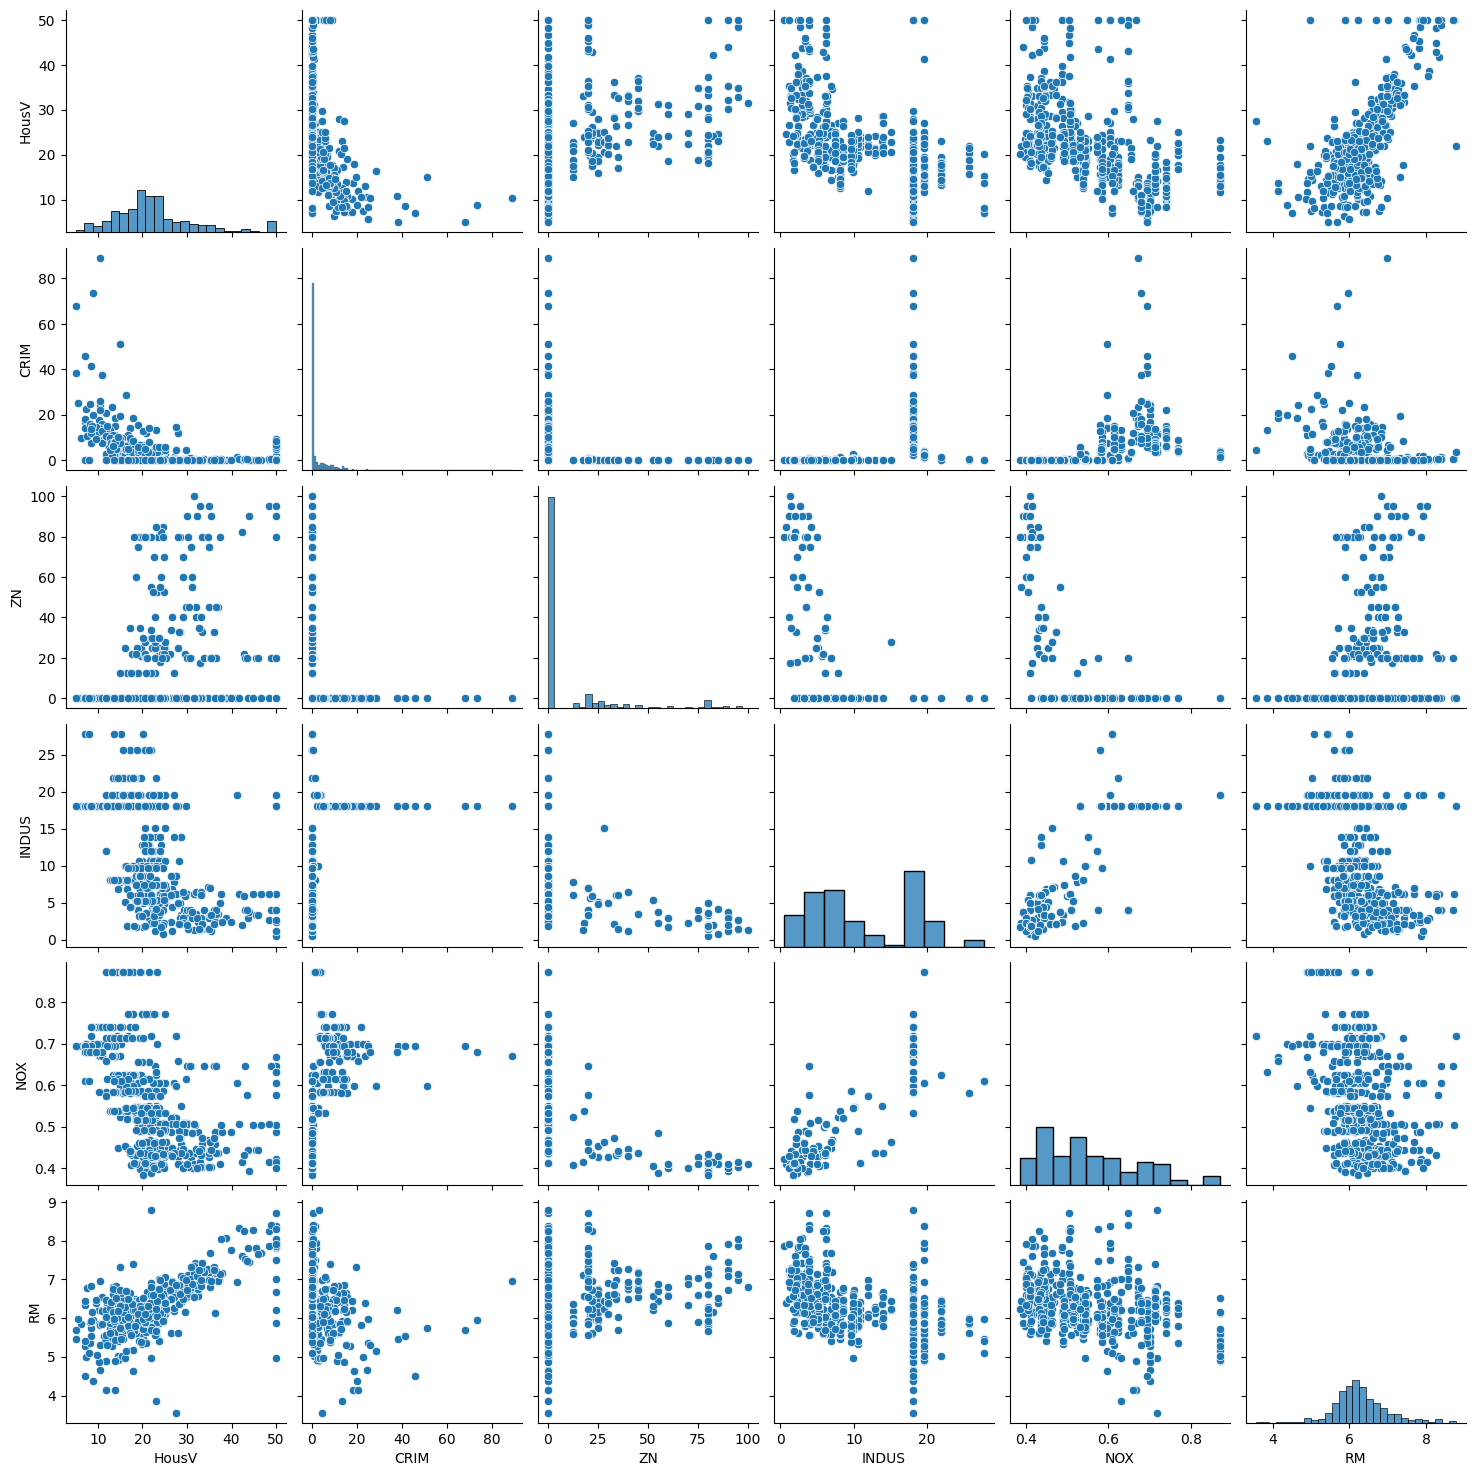

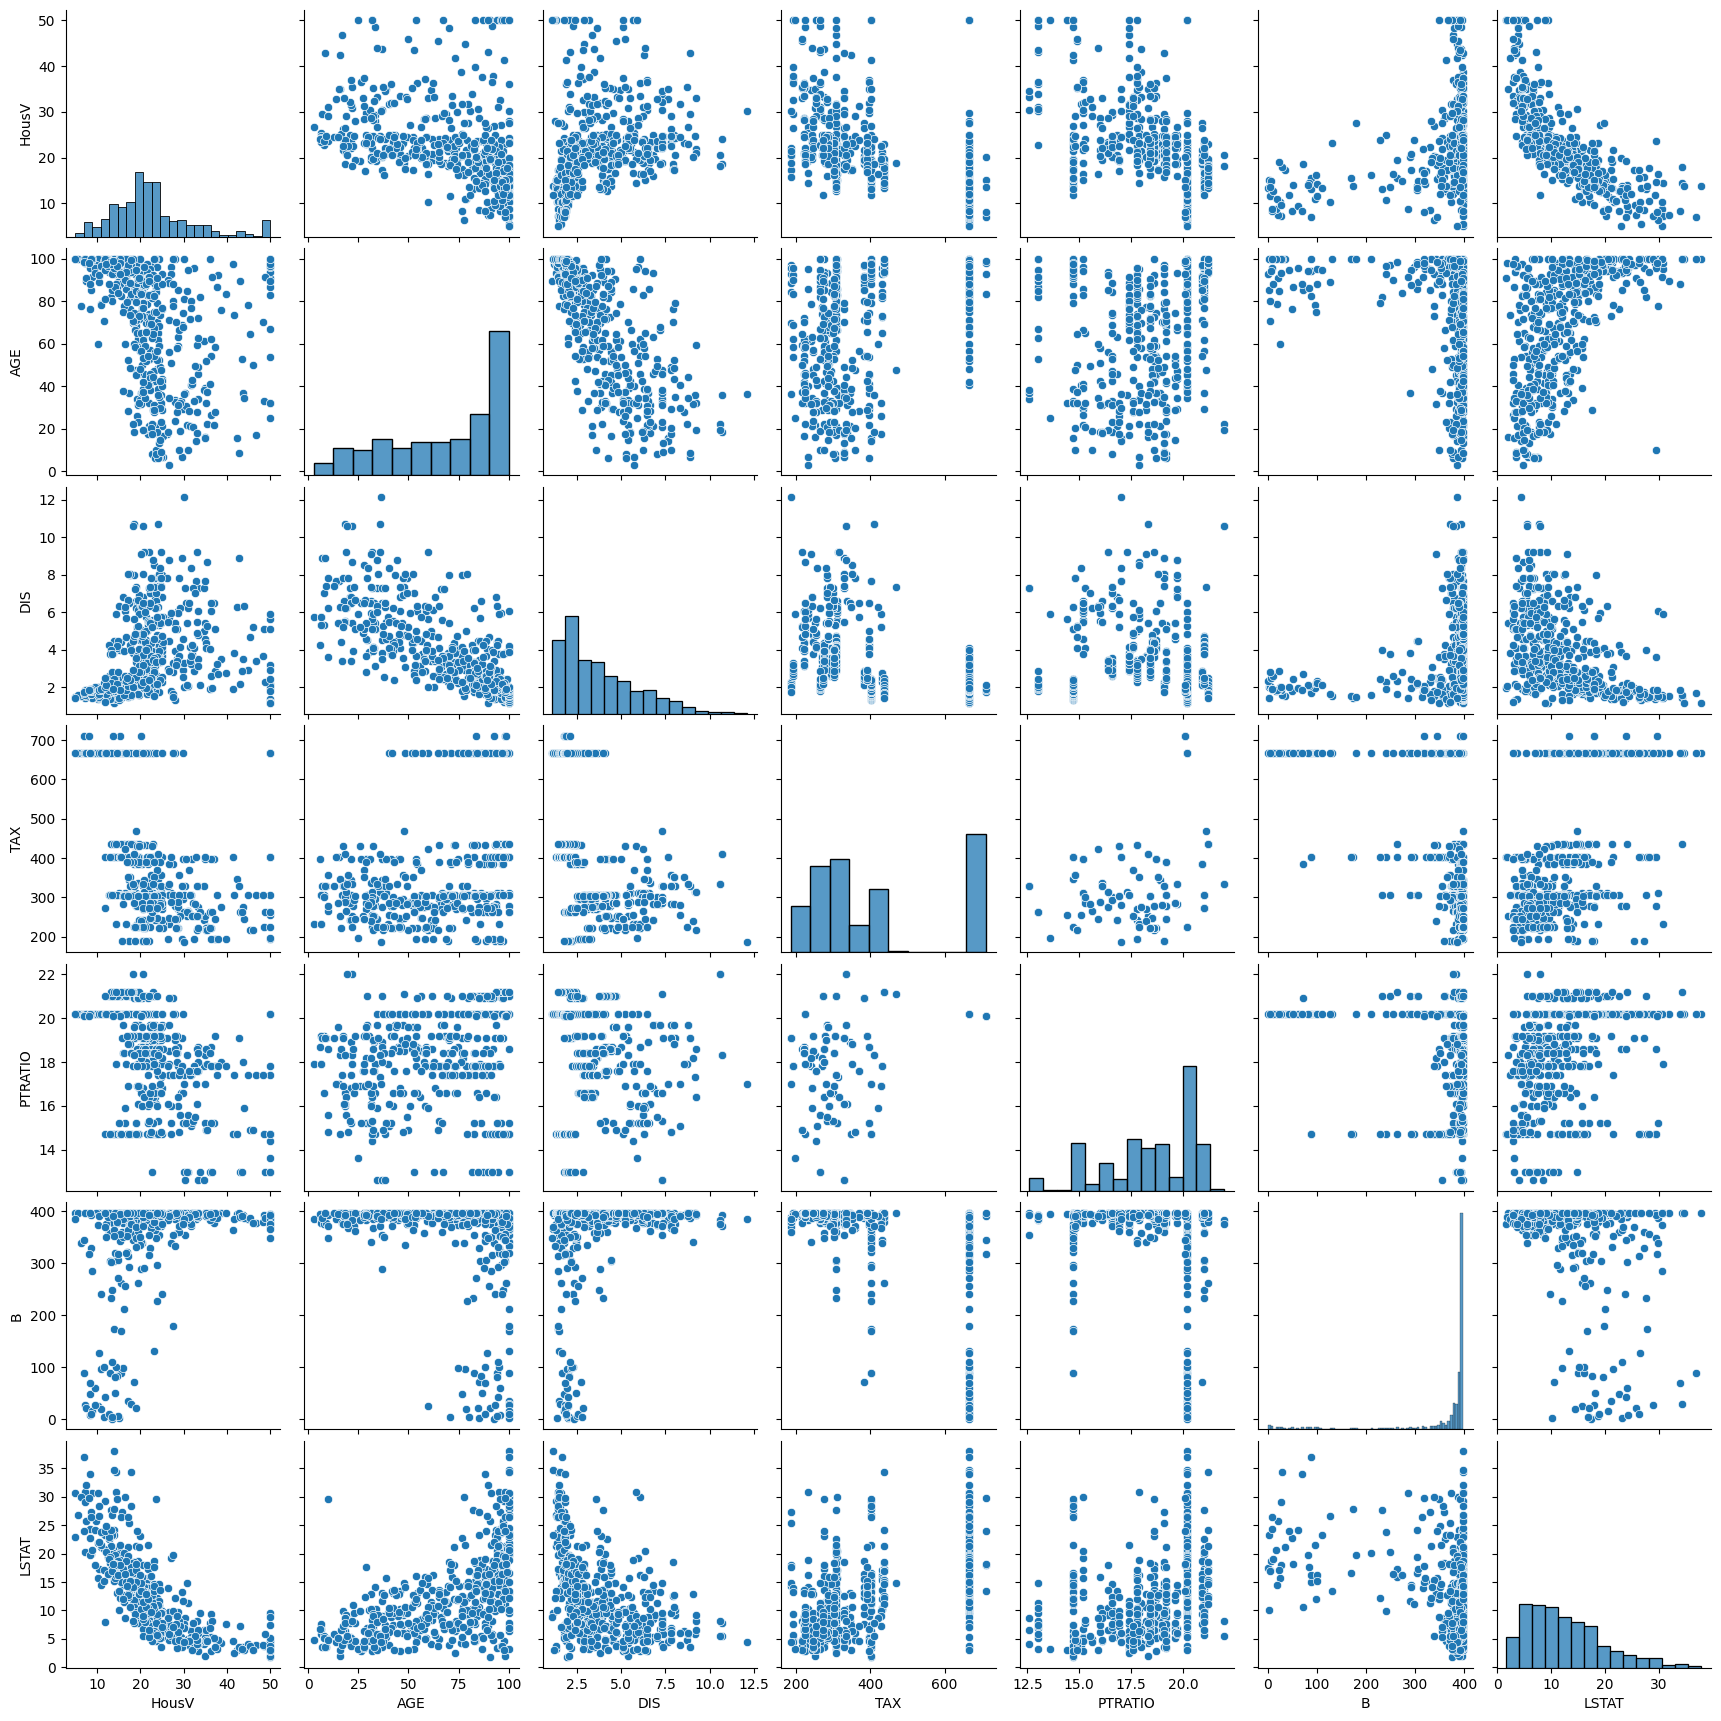

In [4]:
!pip install scikit-learn
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)
print(X) #독립변수
print(X.shape) #행과 열의 개수
print( y[:50])

import numpy as np
import pandas as pd

boston = datasets.fetch_openml('boston')
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df[ 'HousV'] = boston.target
print( df.head() )
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['HousV','CRIM','ZN','INDUS','CHAS','NOX','RM']])
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['HousV','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT']])
plt.show()



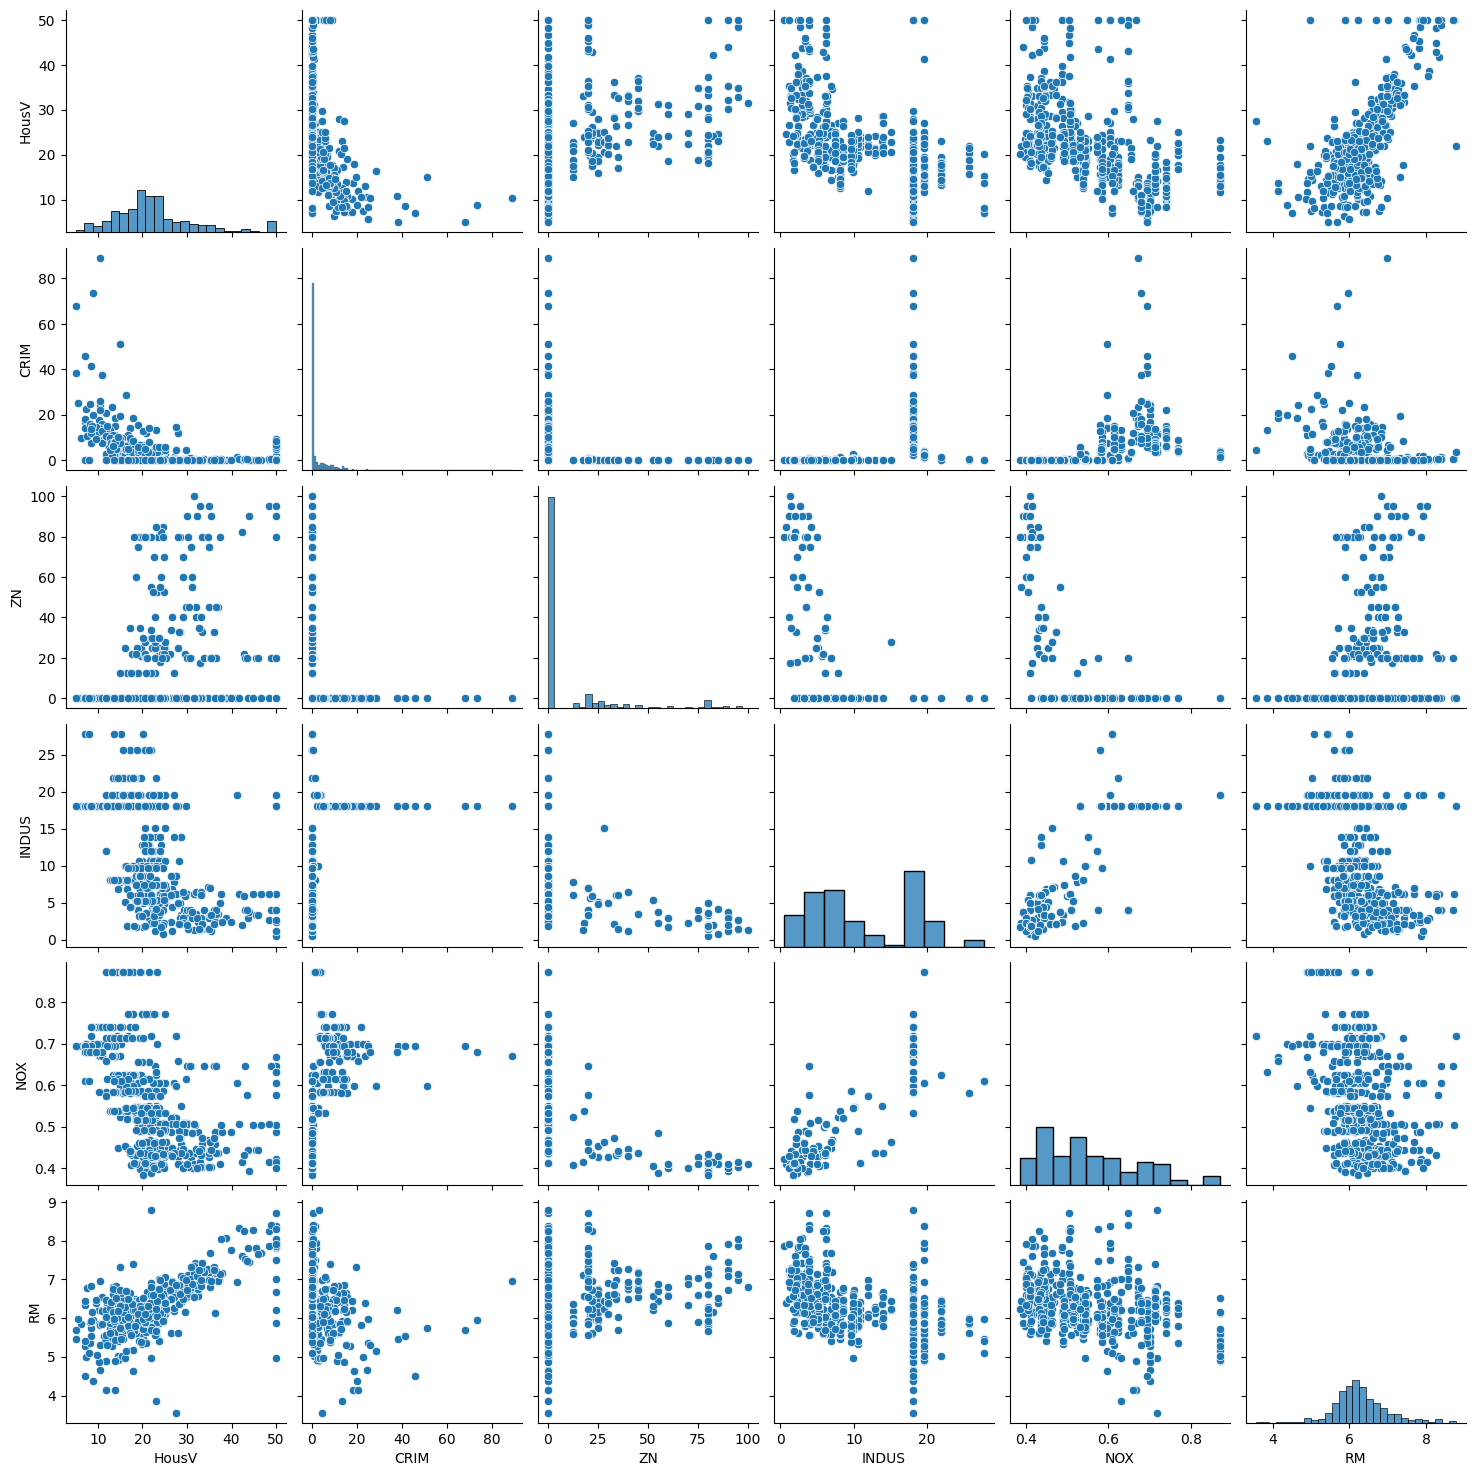

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


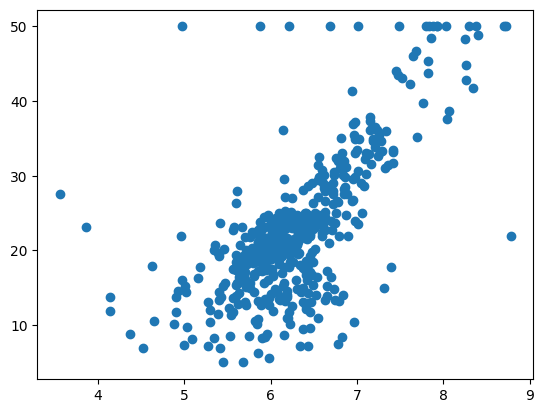

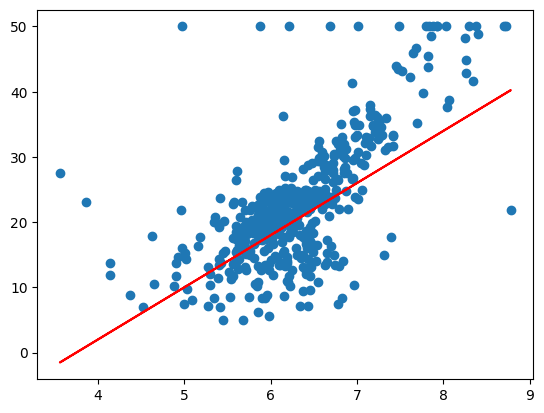

Loss:49.29


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['HousV','CRIM','ZN','INDUS','CHAS','NOX','RM']])
plt.show()

X = df.iloc[:, 5].values # converts it into a numpy array
Y = df.iloc[:, 13].values
print(X[:10]) # RM
print(Y[:10]) # HousV

plt.scatter(X, Y)
plt.show()

plt.scatter(X, Y)

beta_0 = 8
beta_1 = -30
pred_Y = beta_0*X + beta_1
plt.plot( X, pred_Y, c='r')

plt.show()

def loss(Y, pred_Y):
  MeanSQ=np.sum((Y-pred_Y)**2)
  Loss=MeanSQ/len(Y)
  return Loss
#beta_0=8, beta_1=-30일 때의 Loss값임.
print('Loss:%.2f'%loss(Y, pred_Y))



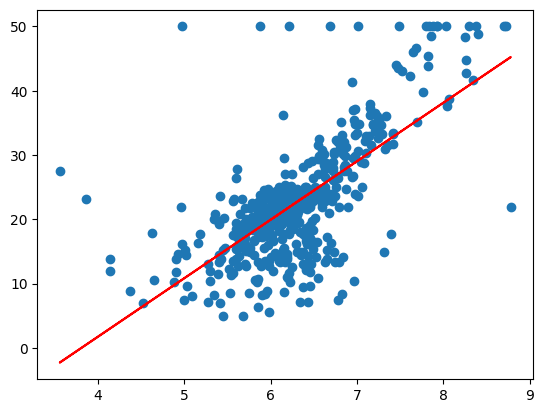

beta_0:9.10
beta_1:-34.67
Loss :43.60


In [10]:
# P180. 머신러닝으로 최적의 기울기와 y절편 예측하기


from sklearn.linear_model import LinearRegression
LRmodel=LinearRegression()
LRmodel.fit(X.reshape(-1, 1), Y) # fit()는 X변수를 2차원으로 넣어줘야 함
# 독립변수가 두 개면 .coef_[0]와 .coef_[1] 두 개가 자동 생성됨
beta_0 = LRmodel.coef_[0] #기울기
beta_1 = LRmodel.intercept_ #y절편
plt.scatter(X, Y)
pred_Y = beta_0*X+beta_1
plt.plot(X, pred_Y, c='r')
plt.show( )
print('beta_0:%.2f'%beta_0)
print('beta_1:%.2f'%beta_1)
print('Loss :%.2f'%loss(Y, pred_Y))


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X.reshape(-1,1), Y, test_size=0.3, random_state=5)
predicted_y_train=LRmodel.predict(x_train)
mse_train=mean_squared_error(y_train,predicted_y_train)
print("MSE on train data: %f"%mse_train)
predicted_y_test=LRmodel.predict(x_test)
mse_test=mean_squared_error(y_test,predicted_y_test)
print("MSE on train data: %f"%mse_test)



MSE on train data: 42.382999
MSE on train data: 46.436169
